In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /Users/NS/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/NS/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# load the dataset
news_d = pd.read_csv("train.csv")

In [4]:
print("Shape of News data:", news_d.shape)

Shape of News data: (20800, 5)


In [5]:
print("News data columns", news_d.columns)

News data columns Index(['id', 'title', 'author', 'text', 'label'], dtype='object')


In [6]:
# by using df.head(), we can immediately familiarize ourselves with the dataset. 
news_d.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [7]:
#Text Word startistics: min.mean, max and interquartile range
txt_length = news_d.text.str.split().str.len()
txt_length.describe()

count    20761.000000
mean       760.308126
std        869.525988
min          0.000000
25%        269.000000
50%        556.000000
75%       1052.000000
max      24234.000000
Name: text, dtype: float64

In [8]:
#Title statistics 
title_length = news_d.title.str.split().str.len()
title_length.describe()

count    20242.000000
mean        12.420709
std          4.098735
min          1.000000
25%         10.000000
50%         13.000000
75%         15.000000
max         72.000000
Name: title, dtype: float64

1: Unreliable
0: Reliable
Distribution of labels:
1    10413
0    10387
Name: label, dtype: int64


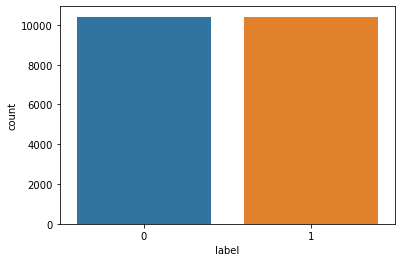

In [9]:
sns.countplot(x="label", data=news_d);
print("1: Unreliable")
print("0: Reliable")
print("Distribution of labels:")
print(news_d.label.value_counts());

In [2]:
print(round(news_d.label.value_counts(normalize=True),2)*100);

NameError: name 'news_d' is not defined

In [1]:
# Constants that are used to sanitize the datasets 
column_n = ['id', 'title', 'author', 'text', 'label']
remove_c = ['id','author']
categorical_features = []
target_col = ['label']
text_f = ['title', 'text']

In [21]:
# Clean Datasets
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
from collections import Counter

In [23]:
ps = PorterStemmer()
wnl = nltk.stem.WordNetLemmatizer()
stop_words = stopwords.words('english')
stopwords_dict = Counter(stop_words)

In [24]:
# Removed unused clumns
def remove_unused_c(df,column_n=remove_c):
    df = df.drop(column_n,axis=1)
    return df

In [12]:
# Impute null values with None
def null_process(feature_df):
    for col in text_f:
        feature_df.loc[feature_df[col].isnull(), col] = "None"
    return feature_df

In [5]:
def clean_dataset(df):
    # remove unused column
    df = remove_unused_c(df)
    #impute null values
    df = null_process(df)
    return df

In [10]:
# Cleaning text from unused characters
def clean_text(text):
    text = str(text).replace(r'http[\w:/\.]+', ' ')  # removing urls
    text = str(text).replace(r'[^\.\w\s]', ' ')  # remove everything but characters and punctuation
    text = str(text).replace('[^a-zA-Z]', ' ')
    text = str(text).replace(r'\s\s+', ' ')
    text = text.lower().strip()
    #text = ' '.join(text)    
    return text

In [8]:
## Nltk Preprocessing include: Stop words, Stemming and Lemmetization, we use only Stop word removal
def nltk_preprocess(text):
    text = clean_text(text)
    wordlist = re.sub(r'[^\w\s]', '', text).split()
    #text = ' '.join([word for word in wordlist if word not in stopwords_dict])
    #text = [ps.stem(word) for word in wordlist if not word in stopwords_dict]
    text = ' '.join([wnl.lemmatize(word) for word in wordlist if word not in stopwords_dict])
    return  text

In [13]:
# Perform data cleaning on train and test dataset by calling clean_dataset function
df = clean_dataset(news_d)

# apply preprocessing on text through apply method by calling the function nltk_preprocess
df["text"] = df.text.apply(nltk_preprocess)

# apply preprocessing on title through apply method by calling the function nltk_preprocess
df["title"] = df.title.apply(nltk_preprocess)

NameError: name 'news_d' is not defined

In [ ]:
# Dataset after cleaning and preprocessing step
df.head()

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [3]:
# initialize the word cloud
wordcloud = WordCloud( background_color='black', width=800, height=600)

# generate the word cloud by passing the corpus
text_cloud = wordcloud.generate(' '.join(df['text']))

# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

NameError: name 'df' is not defined

In [14]:
true_n = ' '.join(df[df['label']==0]['text']) 
wc = wordcloud.generate(true_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

NameError: name 'df' is not defined

In [15]:
fake_n = ' '.join(df[df['label']==1]['text'])
wc= wordcloud.generate(fake_n)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

NameError: name 'df' is not defined

In [16]:
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurences", n=2):
    
    """Utility function to plot top n-grams"""
    
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()

In [18]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Bigrams', "Bigram", n=2)

NameError: name 'true_n' is not defined

In [19]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Bigrams', "Bigram", n=2)

NameError: name 'fake_n' is not defined

In [ ]:
plot_top_ngrams(true_n, 'Top 20 Frequently Occuring True news Trigrams', "Trigrams", n=3)

In [ ]:
plot_top_ngrams(fake_n, 'Top 20 Frequently Occuring Fake news Trigrams', "Trigrams", n=3)

In [ ]:
#pip install transformers (for pipenv)

import torch
import random
from transformers.file_utils import is_tf_available, is_torch_available, is_torch_tpu_available
from transformers import BertTokenizerFast, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
def set_seed(seed: int):
    
    """
    Helper function for reproducible behavior to set the seed in ``random``, ``numpy``, ``torch`` and/or ``tf`` (if
    installed).

    Args:
        seed (:obj:`int`): The seed to set.
    """
    
    random.seed(seed)
    np.random.seed(seed)
    
    if is_torch_available():
        torch.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        
        # ^^ safe to call this function even if cuda is not available
        if is_tf_available():
        import tensorflow as tf

        tf.random.set_seed(seed)

set_seed(1)

In [ ]:
# the model to train, base uncased BERT, text classification models 
# here: https://huggingface.co/models?filter=text-classification
model_name = "bert-base-uncased"

# max sequence length for each document/sentence sample
max_length = 512

In [ ]:
# load the tokenizer
tokenizer = BertTokenizerFast.from_pretrained(model_name, do_lower_case=True)

news_df = news_d[news_d['text'].notna()]
news_df = news_df[news_df["author"].notna()]
news_df = news_df[news_df["title"].notna()]

In [ ]:
def prepare_data(df, test_size=0.2, include_title=True, include_author=True):
    texts = []
    labels = []
    
    for i in range(len(df)):
    text = df["text"].iloc[i]
    label = df["label"].iloc[i]
    
    if include_title:
        text = df["title"].iloc[i] + " - " + text
    
    if include_author:
        text = df["author"].iloc[i] + " : " + text
    
    if text and label in [0, 1]:
        texts.append(text)
        labels.append(label)
    
    return train_test_split(texts, labels, test_size=test_size)

In [ ]:
train_texts, valid_texts, train_labels, valid_labels = prepare_data(news_df)

In [ ]:
print(len(train_texts), len(train_labels))
print(len(valid_texts), len(valid_labels))

In [ ]:
# Tokenize the dataset, truncate when passed `max_length`, pad with 0's when < `max_length`
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=max_length)
valid_encodings = tokenizer(valid_texts, truncation=True, padding=True, max_length=max_length)

In [ ]:
class NewsGroupsDataset(torch.utils.data.Dataset):
    
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
        
    def __getitem__(self, idx):
        item = {k: torch.tensor(v[idx]) for k, v in self.encodings.items()}
        item["labels"] = torch.tensor([self.labels[idx]])
        return item
    
    def __len__(self):
        return len(self.labels)

# convert our tokenized data into a torch Dataset
train_dataset = NewsGroupsDataset(train_encodings, train_labels)
valid_dataset = NewsGroupsDataset(valid_encodings, valid_labels)

In [ ]:
# load the model
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    
    # calculate accuracy using sklearn's function
    acc = accuracy_score(labels, preds)
    
    return {
        
        'accuracy': acc,
    }

In [ ]:
training_args = TrainingArguments(
    
    output_dir='./results',          # output directory
    num_train_epochs=1,              # total number of training epochs
    per_device_train_batch_size=10,  # batch size per device during training
    per_device_eval_batch_size=20,   # batch size for evaluation
    warmup_steps=100,                # number of warmup steps for learning rate scheduler
    logging_dir='./logs',            # directory for storing logs
    load_best_model_at_end=True,     # load the best model when finished training (default metric is loss)
    
    # but you can specify `metric_for_best_model` argument to change to accuracy or other metric
    
    logging_steps=200,               # log & save weights each logging_steps
    save_steps=200,
    evaluation_strategy="steps",     # evaluate each `logging_steps`
)

In [ ]:
trainer = Trainer(
    
    model=model,                         # the instantiated Transformers model to be trained
    args=training_args,                  # training arguments, defined above
    train_dataset=train_dataset,         # training dataset
    eval_dataset=valid_dataset,          # evaluation dataset
    compute_metrics=compute_metrics,     # the callback that computes metrics of interest
)

In [ ]:
# train the model
trainer.train()

In [ ]:
# evaluate the current model after training
trainer.evaluate()

In [ ]:
# saving the fine tuned model & tokenizer
model_path = "fake-news-bert-base-uncased"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)

In [ ]:
def get_prediction(text, convert_to_label=False):
    
    # prepare our text into tokenized sequence
    inputs = tokenizer(text, padding=True, truncation=True, max_length=max_length, return_tensors="pt").to("cuda")
    
    # perform inference to our model
    outputs = model(**inputs)
    
    # get output probabilities by doing softmax
    probs = outputs[0].softmax(1)
    
    # executing argmax function to get the candidate label
    d = {
        0: "reliable",
        1: "fake"
    }
    if convert_to_label:
        return d[int(probs.argmax())]
    
    else:
        return int(probs.argmax())

In [ ]:
real_news = """
    Tim Tebow Will Attempt Another Comeback, This Time in Baseball - The New York Times",Daniel Victor,"If at first you don’t succeed, try a different sport. Tim Tebow, who was a Heisman   quarterback at the University of Florida but was unable to hold an N. F. L. job, is pursuing a career in Major League Baseball. <SNIPPED>
"""

In [ ]:
get_prediction(real_news, convert_to_label=True)

In [ ]:
# read the test set
test_df = pd.read_csv("test.csv")

# make a copy of the testing set
new_df = test_df.copy()

# add a new column that contains the author, title and article content
new_df["new_text"] = new_df["author"].astype(str) + " : " + new_df["title"].astype(str) + " - " + new_df["text"]

# get the prediction of all the test set
new_df["label"] = new_df["new_text"].apply(get_prediction)

# make the submission file
final_df = new_df[["id", "label"]]
final_df.to_csv("submit_final.csv", index=False)